In [4]:
import config
import torch
from dataset import get_dataloader
from model import Yolov1
from loss import YoloLoss
from train import train_fn

In [5]:
!python preprocessing_data.py

Creating training labels ...
Generate csv file ...
Done!!


In [6]:
train_loader, val_loader, test_loader = get_dataloader()
loss_fn = YoloLoss(num_grids=config.NUM_GRIDS, num_boxes=config.NUM_BOXES)
model = Yolov1(
    in_channels=3, num_grids=config.NUM_GRIDS, num_boxes=config.NUM_BOXES
).to(config.DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=config.LR, weight_decay=config.WEIGHT_DECAY)
mean_losses, list_best_mAP = train_fn(model, train_loader, val_loader, optimizer, loss_fn, cal_mAP_freq=20)

Start epoch:  0


100%|██████████| 88/88 [00:17<00:00,  4.99it/s, loss=tensor(2.8125, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 23.833044637333263
Start epoch:  1


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(4.9994, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 11.95643643357537
Start epoch:  2


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(2.5607, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.445021484385837
Start epoch:  3


100%|██████████| 88/88 [00:16<00:00,  5.36it/s, loss=tensor(5.3920, device='cuda:0', grad_fn=<AddBackward0>)]  


Mean loss was 18.464796553958546
Start epoch:  4


100%|██████████| 88/88 [00:16<00:00,  5.40it/s, loss=tensor(4.0207, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 10.879367554729635
Start epoch:  5


100%|██████████| 88/88 [00:16<00:00,  5.26it/s, loss=tensor(2.0293, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 9.200346543030305
Start epoch:  6


100%|██████████| 88/88 [00:16<00:00,  5.33it/s, loss=tensor(1.1490, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.157735455442559
Start epoch:  7


100%|██████████| 88/88 [00:16<00:00,  5.27it/s, loss=tensor(2.0412, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.629707802425731
Start epoch:  8


100%|██████████| 88/88 [00:16<00:00,  5.30it/s, loss=tensor(8.4508, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 7.4291040213270625
Start epoch:  9


100%|██████████| 88/88 [00:16<00:00,  5.27it/s, loss=tensor(3.8484, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 10.188433776524933
Start epoch:  10


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(6.0027, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.474268758838827
Start epoch:  11


100%|██████████| 88/88 [00:16<00:00,  5.27it/s, loss=tensor(6.5153, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 7.420089546252381
Start epoch:  12


100%|██████████| 88/88 [00:16<00:00,  5.28it/s, loss=tensor(3.5827, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 7.047446985813704
Start epoch:  13


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.6089, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 6.830797587267377
Start epoch:  14


100%|██████████| 88/88 [00:16<00:00,  5.23it/s, loss=tensor(1.9231, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 6.464973300695419
Start epoch:  15


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.2503, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 6.96822068061341
Start epoch:  16


100%|██████████| 88/88 [00:16<00:00,  5.21it/s, loss=tensor(0.3517, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 5.948320505632595
Start epoch:  17


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(3.6727, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.9707153046673
Start epoch:  18


100%|██████████| 88/88 [00:16<00:00,  5.24it/s, loss=tensor(0.5927, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.236228600821711
Start epoch:  19


100%|██████████| 88/88 [00:16<00:00,  5.28it/s, loss=tensor(1.9837, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.276266694746234
Get boxes....
Compute mAP....
Val mAP: 0.01758192852139473
Save model
=> Saving checkpoint
Start epoch:  20


100%|██████████| 88/88 [00:16<00:00,  5.34it/s, loss=tensor(1.9836, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.486472546715628
Start epoch:  28


100%|██████████| 88/88 [00:16<00:00,  5.42it/s, loss=tensor(1.7240, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.8838944428346376
Start epoch:  29


100%|██████████| 88/88 [00:16<00:00,  5.38it/s, loss=tensor(1.8583, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.728638545186682
Start epoch:  30


100%|██████████| 88/88 [00:16<00:00,  5.38it/s, loss=tensor(1.3753, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.8502409511076454
Start epoch:  31


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(3.1073, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 7.072253676978025
Start epoch:  32


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(5.3009, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 5.580379983240908
Start epoch:  33


100%|██████████| 88/88 [00:16<00:00,  5.29it/s, loss=tensor(2.6270, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 6.581086629832333
Start epoch:  34


100%|██████████| 88/88 [00:16<00:00,  5.36it/s, loss=tensor(3.1515, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 7.211833173239773
Start epoch:  35


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(8.9355, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.512157755141908
Start epoch:  36


100%|██████████| 88/88 [00:16<00:00,  5.41it/s, loss=tensor(3.5411, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.97108525774357
Start epoch:  37


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(3.2333, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.656356706199321
Start epoch:  38


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(1.8646, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.170322535390204
Start epoch:  39


100%|██████████| 88/88 [00:16<00:00,  5.36it/s, loss=tensor(2.8482, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.1247513265433637
Get boxes....
Compute mAP....
Val mAP: 0.07943537086248398
Save model
=> Saving checkpoint
Start epoch:  40


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(1.5547, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.0268398965285583
Start epoch:  41


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(1.4605, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.9350261891430074
Start epoch:  42


100%|██████████| 88/88 [00:16<00:00,  5.39it/s, loss=tensor(1.3449, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.7161167794838548
Start epoch:  43


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(0.0552, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.17195361005989
Start epoch:  44


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(0.6344, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.602616703307087
Start epoch:  45


100%|██████████| 88/88 [00:16<00:00,  5.33it/s, loss=tensor(0.8814, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.251001632518389
Start epoch:  46


100%|██████████| 88/88 [00:16<00:00,  5.42it/s, loss=tensor(1.5223, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.6142892376943068
Start epoch:  47


100%|██████████| 88/88 [00:16<00:00,  5.33it/s, loss=tensor(5.4201, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 7.373397349972617
Start epoch:  48


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(1.0012, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 5.815691720016978
Start epoch:  49


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(0.7873, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.662664875726808
Start epoch:  50


100%|██████████| 88/88 [00:16<00:00,  5.34it/s, loss=tensor(1.0650, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.132202493196184
Start epoch:  51


100%|██████████| 88/88 [00:16<00:00,  5.29it/s, loss=tensor(1.5396, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.3340670311484826
Start epoch:  52


100%|██████████| 88/88 [00:16<00:00,  5.30it/s, loss=tensor(0.2585, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.292304742573337
Start epoch:  53


100%|██████████| 88/88 [00:16<00:00,  5.28it/s, loss=tensor(3.4799, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.048968878320672
Start epoch:  54


100%|██████████| 88/88 [00:16<00:00,  5.36it/s, loss=tensor(0.0509, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.970206234985116
Start epoch:  55


100%|██████████| 88/88 [00:16<00:00,  5.24it/s, loss=tensor(0.2139, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.6867379166863181
Start epoch:  56


100%|██████████| 88/88 [00:16<00:00,  5.24it/s, loss=tensor(1.0281, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.7223798293112353
Start epoch:  57


100%|██████████| 88/88 [00:16<00:00,  5.18it/s, loss=tensor(2.7349, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.9157543820752339
Start epoch:  58


100%|██████████| 88/88 [00:16<00:00,  5.19it/s, loss=tensor(1.4905, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.4500080713663588
Start epoch:  59


100%|██████████| 88/88 [00:16<00:00,  5.25it/s, loss=tensor(1.7974, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.360102166506377
Get boxes....
Compute mAP....
Val mAP: 0.30100175738334656
Save model
=> Saving checkpoint
Start epoch:  60


100%|██████████| 88/88 [00:16<00:00,  5.25it/s, loss=tensor(0.7276, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1682814001529054
Start epoch:  61


100%|██████████| 88/88 [00:16<00:00,  5.22it/s, loss=tensor(3.1399, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1986993296198885
Start epoch:  62


100%|██████████| 88/88 [00:16<00:00,  5.23it/s, loss=tensor(0.0372, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 1.4196230851283127
Start epoch:  63


100%|██████████| 88/88 [00:16<00:00,  5.21it/s, loss=tensor(2.4642, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.239667756482959
Start epoch:  64


100%|██████████| 88/88 [00:16<00:00,  5.26it/s, loss=tensor(0.1906, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.140377524393526
Start epoch:  65


100%|██████████| 88/88 [00:16<00:00,  5.23it/s, loss=tensor(9.5201, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.0474897040562197
Start epoch:  66


100%|██████████| 88/88 [00:16<00:00,  5.30it/s, loss=tensor(0.0893, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.482216851193119
Start epoch:  67


100%|██████████| 88/88 [00:16<00:00,  5.25it/s, loss=tensor(1.1538, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.978653344071724
Start epoch:  68


100%|██████████| 88/88 [00:16<00:00,  5.22it/s, loss=tensor(1.1656, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.4031504761766302
Start epoch:  69


100%|██████████| 88/88 [00:16<00:00,  5.18it/s, loss=tensor(0.0984, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.481303871863268
Start epoch:  70


100%|██████████| 88/88 [00:16<00:00,  5.24it/s, loss=tensor(1.1708, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.257564954459667
Start epoch:  71


100%|██████████| 88/88 [00:16<00:00,  5.21it/s, loss=tensor(0.1665, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.6145906856029548
Start epoch:  72


100%|██████████| 88/88 [00:16<00:00,  5.29it/s, loss=tensor(0.6046, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.7527434734881602
Start epoch:  73


100%|██████████| 88/88 [00:16<00:00,  5.25it/s, loss=tensor(0.5467, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.444118312136694
Start epoch:  74


100%|██████████| 88/88 [00:16<00:00,  5.29it/s, loss=tensor(1.3860, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.8282169205221264
Start epoch:  75


100%|██████████| 88/88 [00:16<00:00,  5.19it/s, loss=tensor(0.2559, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 1.8669509404889224
Start epoch:  76


100%|██████████| 88/88 [00:16<00:00,  5.22it/s, loss=tensor(1.2104, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.214508578244766
Start epoch:  77


100%|██████████| 88/88 [00:16<00:00,  5.27it/s, loss=tensor(1.0882, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.0843887730840256
Start epoch:  78


100%|██████████| 88/88 [00:16<00:00,  5.26it/s, loss=tensor(0.3834, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.8646746562285856
Start epoch:  79


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(0.2739, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.054013835943558
Get boxes....
Compute mAP....
Val mAP: 0.30619245767593384
Save model
=> Saving checkpoint
Start epoch:  80


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.1597, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1229966904290698
Start epoch:  81


100%|██████████| 88/88 [00:16<00:00,  5.18it/s, loss=tensor(1.7166, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.266350925900042
Start epoch:  82


100%|██████████| 88/88 [00:16<00:00,  5.30it/s, loss=tensor(1.4402, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.6216606682335788
Start epoch:  83


100%|██████████| 88/88 [00:16<00:00,  5.24it/s, loss=tensor(1.6675, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.9896807579154316
Start epoch:  84


100%|██████████| 88/88 [00:16<00:00,  5.33it/s, loss=tensor(0.9468, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.1250685182484714
Start epoch:  85


100%|██████████| 88/88 [00:16<00:00,  5.27it/s, loss=tensor(1.6795, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.326138457198712
Start epoch:  86


100%|██████████| 88/88 [00:16<00:00,  5.36it/s, loss=tensor(0.9075, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9232651077803563
Start epoch:  87


100%|██████████| 88/88 [00:16<00:00,  5.25it/s, loss=tensor(0.9587, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.8788477668369358
Start epoch:  88


100%|██████████| 88/88 [00:16<00:00,  5.24it/s, loss=tensor(0.2281, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.4147936066781932
Start epoch:  89


100%|██████████| 88/88 [00:16<00:00,  5.27it/s, loss=tensor(0.0163, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.2825857883065261
Start epoch:  90


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.3785, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6733601289928298
Start epoch:  91


100%|██████████| 88/88 [00:16<00:00,  5.29it/s, loss=tensor(1.2940, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.8720313715325161
Start epoch:  92


100%|██████████| 88/88 [00:16<00:00,  5.34it/s, loss=tensor(0.0872, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.8657453119839457
Start epoch:  93


100%|██████████| 88/88 [00:16<00:00,  5.28it/s, loss=tensor(0.0195, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7768961699383164
Start epoch:  94


100%|██████████| 88/88 [00:16<00:00,  5.29it/s, loss=tensor(0.2582, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9357399680990387
Start epoch:  95


100%|██████████| 88/88 [00:16<00:00,  5.23it/s, loss=tensor(0.0636, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.172709846361117
Start epoch:  96


100%|██████████| 88/88 [00:16<00:00,  5.25it/s, loss=tensor(1.8931, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.4059478698975663
Start epoch:  97


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.3119, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 1.789699632039463
Start epoch:  98


100%|██████████| 88/88 [00:16<00:00,  5.27it/s, loss=tensor(0.2123, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1376288048499688
Start epoch:  99


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(0.3184, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.8859441720626571
Get boxes....
Compute mAP....
Val mAP: 0.35955914855003357
Save model
=> Saving checkpoint
Start epoch:  100


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(0.5094, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6641510438851335
Start epoch:  101


100%|██████████| 88/88 [00:16<00:00,  5.28it/s, loss=tensor(0.8097, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.84063896744258
Start epoch:  102


100%|██████████| 88/88 [00:16<00:00,  5.33it/s, loss=tensor(2.2476, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.337396218018099
Start epoch:  103


100%|██████████| 88/88 [00:16<00:00,  5.28it/s, loss=tensor(0.2638, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.1166706186803905
Start epoch:  104


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(0.7072, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.3665884387764065
Start epoch:  105


100%|██████████| 88/88 [00:16<00:00,  5.27it/s, loss=tensor(0.1233, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.714523176366294
Start epoch:  106


100%|██████████| 88/88 [00:16<00:00,  5.27it/s, loss=tensor(1.1890, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.0533435602503065
Start epoch:  107


100%|██████████| 88/88 [00:16<00:00,  5.25it/s, loss=tensor(0.1129, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.1975829675793648
Start epoch:  108


100%|██████████| 88/88 [00:16<00:00,  5.29it/s, loss=tensor(0.5327, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.0867831464856863
Start epoch:  109


100%|██████████| 88/88 [00:16<00:00,  5.24it/s, loss=tensor(0.0368, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9476288183676925
Start epoch:  110


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(0.4325, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.0192388679662887
Start epoch:  111


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.0868, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.2433527406643736
Start epoch:  112


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(2.6398, device='cuda:0', grad_fn=<AddBackward0>)]  


Mean loss was 10.667626816694709
Start epoch:  113


100%|██████████| 88/88 [00:16<00:00,  5.28it/s, loss=tensor(1.8582, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.294831378893418
Start epoch:  114


100%|██████████| 88/88 [00:16<00:00,  5.33it/s, loss=tensor(11.8662, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 3.6138535351915793
Start epoch:  115


100%|██████████| 88/88 [00:16<00:00,  5.26it/s, loss=tensor(2.3507, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.020258699289777
Start epoch:  116


100%|██████████| 88/88 [00:16<00:00,  5.30it/s, loss=tensor(2.1828, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.9405196778137574
Start epoch:  117


100%|██████████| 88/88 [00:16<00:00,  5.33it/s, loss=tensor(1.1398, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.7119857770475475
Start epoch:  118


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.3152, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.484867955304005
Start epoch:  119


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(0.7858, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.4322441843422977
Get boxes....
Compute mAP....
Val mAP: 0.41539064049720764
Save model
=> Saving checkpoint
Start epoch:  120


100%|██████████| 88/88 [00:16<00:00,  5.30it/s, loss=tensor(0.6075, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.0592555701309307
Start epoch:  121


100%|██████████| 88/88 [00:16<00:00,  5.30it/s, loss=tensor(0.7541, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9448795599693601
Start epoch:  122


100%|██████████| 88/88 [00:16<00:00,  5.38it/s, loss=tensor(0.5393, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9301563385366038
Start epoch:  123


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.1746, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.673575024289841
Start epoch:  124


100%|██████████| 88/88 [00:16<00:00,  5.42it/s, loss=tensor(0.0190, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6429587648758157
Start epoch:  125


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(0.2164, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.2873340926387093
Start epoch:  126


100%|██████████| 88/88 [00:16<00:00,  5.39it/s, loss=tensor(1.1633, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 1.1538804241202094
Start epoch:  127


100%|██████████| 88/88 [00:16<00:00,  5.36it/s, loss=tensor(0.0445, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1532552184706384
Start epoch:  128


100%|██████████| 88/88 [00:16<00:00,  5.39it/s, loss=tensor(0.5729, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9127702181312171
Start epoch:  129


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(1.5446, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.8707584662955593
Start epoch:  130


100%|██████████| 88/88 [00:16<00:00,  5.41it/s, loss=tensor(0.0306, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7881553370124575
Start epoch:  131


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(0.6732, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5325350241989575
Start epoch:  132


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(0.0368, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5017370277253742
Start epoch:  133


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(0.1421, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6496963114054366
Start epoch:  134


100%|██████████| 88/88 [00:16<00:00,  5.36it/s, loss=tensor(0.1470, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6404227000999857
Start epoch:  135


100%|██████████| 88/88 [00:16<00:00,  5.33it/s, loss=tensor(0.0557, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.696946674682708
Start epoch:  136


100%|██████████| 88/88 [00:16<00:00,  5.40it/s, loss=tensor(0.1380, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.4790502209216356
Start epoch:  137


100%|██████████| 88/88 [00:16<00:00,  5.36it/s, loss=tensor(0.0828, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.3617342127360065
Start epoch:  138


100%|██████████| 88/88 [00:16<00:00,  5.39it/s, loss=tensor(0.0136, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.656446117230437
Start epoch:  139


100%|██████████| 88/88 [00:16<00:00,  5.34it/s, loss=tensor(1.0554, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.46330080469223583
Get boxes....
Compute mAP....
Val mAP: 0.3879527449607849
Start epoch:  140


100%|██████████| 88/88 [00:16<00:00,  5.33it/s, loss=tensor(0.7867, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.4861362611620941
Start epoch:  141


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(0.3142, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.39980103386650706
Start epoch:  142


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(0.0560, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.3319224818524989
Start epoch:  143


100%|██████████| 88/88 [00:16<00:00,  5.39it/s, loss=tensor(0.0375, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.4385682436298918
Start epoch:  144


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.0753, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2938500151715495
Start epoch:  145


100%|██████████| 88/88 [00:16<00:00,  5.36it/s, loss=tensor(0.1727, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.22359134544703094
Start epoch:  146


100%|██████████| 88/88 [00:16<00:00,  5.29it/s, loss=tensor(0.4883, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2269714936529371
Start epoch:  147


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(0.0826, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2640744057822634
Start epoch:  148


100%|██████████| 88/88 [00:16<00:00,  5.33it/s, loss=tensor(0.0146, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.325763812542639
Start epoch:  149


100%|██████████| 88/88 [00:16<00:00,  5.40it/s, loss=tensor(0.0685, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.3363454078154808
Start epoch:  150


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(0.0148, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.3118583114965903
Start epoch:  151


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(1.0790, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.7061825785785913
Start epoch:  152


100%|██████████| 88/88 [00:16<00:00,  5.33it/s, loss=tensor(0.1639, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.5081244410777632
Start epoch:  153


100%|██████████| 88/88 [00:16<00:00,  5.36it/s, loss=tensor(0.3966, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.014358727261424
Start epoch:  154


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(4.0870, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.6385450974445452
Start epoch:  155


100%|██████████| 88/88 [00:16<00:00,  5.36it/s, loss=tensor(0.4494, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1606306363405152
Start epoch:  156


100%|██████████| 88/88 [00:16<00:00,  5.40it/s, loss=tensor(0.8556, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.4404158444905824
Start epoch:  157


100%|██████████| 88/88 [00:16<00:00,  5.29it/s, loss=tensor(0.1685, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.0800963087769395
Start epoch:  158


100%|██████████| 88/88 [00:16<00:00,  5.33it/s, loss=tensor(0.3594, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5325841494327919
Start epoch:  159


100%|██████████| 88/88 [00:16<00:00,  5.26it/s, loss=tensor(0.5976, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9348692872921344
Get boxes....
Compute mAP....
Val mAP: 0.2177528589963913
Start epoch:  160


100%|██████████| 88/88 [00:16<00:00,  5.39it/s, loss=tensor(0.1711, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2470869773109867
Start epoch:  168


100%|██████████| 88/88 [00:16<00:00,  5.40it/s, loss=tensor(0.0099, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.20615998523267495
Start epoch:  169


100%|██████████| 88/88 [00:16<00:00,  5.40it/s, loss=tensor(0.0152, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.17667953423436053
Start epoch:  170


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.1283, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.1565645453308455
Start epoch:  171


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(0.0052, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.17198530888841065
Start epoch:  172


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(1.9789, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.19725989665709098
Start epoch:  173


100%|██████████| 88/88 [00:16<00:00,  5.40it/s, loss=tensor(0.2202, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.21613827823999932
Start epoch:  174


100%|██████████| 88/88 [00:16<00:00,  5.36it/s, loss=tensor(0.3483, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.3169057836904275
Start epoch:  175


100%|██████████| 88/88 [00:16<00:00,  5.41it/s, loss=tensor(0.1995, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.4583288508001715
Start epoch:  176


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(0.1079, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.4067853817673908
Start epoch:  177


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(0.0133, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.4354559891349213
Start epoch:  178


100%|██████████| 88/88 [00:16<00:00,  5.26it/s, loss=tensor(0.3726, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.3684580353385007
Start epoch:  179


100%|██████████| 88/88 [00:16<00:00,  5.34it/s, loss=tensor(0.0649, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.40336824528110976
Get boxes....
Compute mAP....
Val mAP: 0.37686070799827576
Start epoch:  180


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(0.0344, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.399077254940163
Start epoch:  181


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.0059, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2516059621332467
Start epoch:  182


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.0740, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.192218205711635
Start epoch:  183


100%|██████████| 88/88 [00:16<00:00,  5.26it/s, loss=tensor(0.0876, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.24611987795850093
Start epoch:  184


100%|██████████| 88/88 [00:16<00:00,  5.29it/s, loss=tensor(0.0484, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2268216650171036
Start epoch:  185


100%|██████████| 88/88 [00:16<00:00,  5.27it/s, loss=tensor(0.1136, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.29213589658452704
Start epoch:  186


100%|██████████| 88/88 [00:16<00:00,  5.34it/s, loss=tensor(0.4703, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.525477444414388
Start epoch:  187


100%|██████████| 88/88 [00:16<00:00,  5.28it/s, loss=tensor(0.5479, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 1.778889668174088
Start epoch:  188


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(1.5199, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.262783522971652
Start epoch:  189


100%|██████████| 88/88 [00:16<00:00,  5.28it/s, loss=tensor(1.0937, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 1.7082720235498114
Start epoch:  190


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(0.1727, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7395972718738697
Start epoch:  191


100%|██████████| 88/88 [00:16<00:00,  5.32it/s, loss=tensor(0.3388, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6669819568368521
Start epoch:  192


100%|██████████| 88/88 [00:16<00:00,  5.42it/s, loss=tensor(0.0641, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.33109469641931355
Start epoch:  193


100%|██████████| 88/88 [00:16<00:00,  5.46it/s, loss=tensor(0.0360, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.44248751106417994
Start epoch:  194


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(0.0112, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2530619719446721
Start epoch:  195


100%|██████████| 88/88 [00:16<00:00,  5.38it/s, loss=tensor(0.1919, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.17741354381326924
Start epoch:  196


100%|██████████| 88/88 [00:16<00:00,  5.31it/s, loss=tensor(0.2227, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.15417965767185457
Start epoch:  197


100%|██████████| 88/88 [00:16<00:00,  5.35it/s, loss=tensor(0.0388, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.11908272723138164
Start epoch:  198


100%|██████████| 88/88 [00:16<00:00,  5.29it/s, loss=tensor(0.0660, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.10127520774999126
Start epoch:  199


100%|██████████| 88/88 [00:16<00:00,  5.37it/s, loss=tensor(0.0143, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.11302657032766464
Get boxes....
Compute mAP....
Val mAP: 0.41483619809150696
Done!!!, best_mAP:  0.41539064049720764


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from utils import yolobox_to_realbox, get_list_of_boxes, do_NMS, load_checkpoint

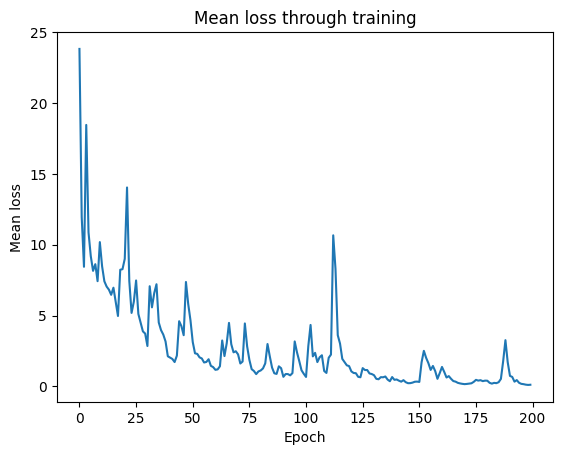

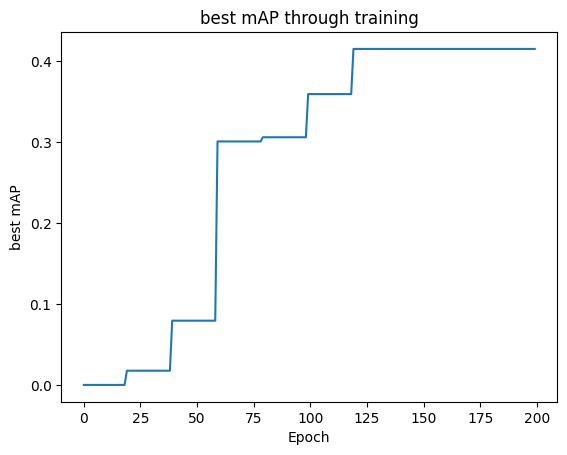

In [8]:
fig = plt.figure()
x = np.arange(len(mean_losses))
plt.plot(x, mean_losses)
plt.title('Mean loss through training')
plt.xlabel('Epoch')
plt.ylabel('Mean loss')
plt.show()

fig = plt.figure()
x = np.arange(len(list_best_mAP))
plt.plot(x, list_best_mAP)
plt.title('best mAP through training')
plt.xlabel('Epoch')
plt.ylabel('best mAP')
plt.show()

In [9]:
def draw_bounding_boxes(image, bndboxes, with_confidence_score=False):
    """Draw parsing bounding boxes on an image and saves it.
        Args:
            image_path (path): Path to the image.
            bndboxes (list): List of predicted bounding boxes, format: [x, y, w, h, cls, conf].
            with_confidence_score (bool, optional): Show confidence score or not. Defaults is False.
        Returns:
            (Image): The image with drawn bounding boxes.
    """
    # Load the image
    new_image = image.copy()
    image_height, image_width, _ = image.shape
    
    for obj in bndboxes:
        xmin, ymin, xmax, ymax = yolobox_to_realbox(obj[:4], image_width, image_height)
        text = f"{obj[4]}" if with_confidence_score else ""
        new_image = cv2.rectangle(new_image, (xmin, ymin), (xmax, ymax), color=(255,0,0), thickness=2)
        new_image = cv2.putText(new_image, text, (xmin, ymin-5), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                   fontScale=0.5, color=(255,0,0), thickness=2, lineType=cv2.LINE_AA)  
    return new_image


def display_image(image_path, predicted_bndboxes=None, label_path=None):
    """Display an image with optinal predicted bounding boxes and true bounding boxes
    
        Args:
            image_path (Path): Path to image
            predicted_bndboxes (list | np.darray, optinal): 
            label_path (str, optinal): Path to true bounding boxes. Default is None
    """
    # Create a figure for plotting
    image_name = image_path.split('/')[-1]
    fig = plt.figure(figsize=(12, 8))
    num_rows = 1
    num_cols = 3 if (predicted_bndboxes is not None and label_path is not None) else 2  
    
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    # Display the original image
    image_index = 1
    ax1 = plt.subplot(num_rows, num_cols, image_index)
    ax1.imshow(image)
    ax1.set_title('Original image')
    
    # Display the predicted bounding boxes
    if predicted_bndboxes is not None:
        image_index += 1
        ax2 = plt.subplot(num_rows, num_cols, image_index)
        predicted_image = draw_bounding_boxes(image, predicted_bndboxes, with_confidence_score=True)
        ax2.imshow(predicted_image)
        ax2.set_title('Prediction')
    
    
    # Display the true bouding boxes
    if label_path is not None:
        image_index += 1
        ax3 = plt.subplot(num_rows, num_cols, image_index)
        
        # Load true bounding boxes from label file
        true_bndboxes = []
        with open(label_path) as label_file:
            for line in label_file.readlines():
                bndbox = list(map(float, line.split()))
                order = [0, 1, 2, 3]
                bndbox = [bndbox[order[i]] for i in range(4)]
                true_bndboxes.append(bndbox)
        
        groundtruth_image = draw_bounding_boxes(image, true_bndboxes, with_confidence_score=False)
        ax3.imshow(groundtruth_image)
        ax3.set_title('Grouth truth')
    fig.tight_layout()
    plt.show()

    
def get_prediction(model, image, threshold, iou_threshold):
    model.eval()
    prediction = model(image)
    prediction = prediction.reshape(1, config.NUM_GRIDS, config.NUM_GRIDS, -1)
    prediction = get_list_of_boxes(prediction, S=config.NUM_GRIDS)
    for i in range(1):
        nms_boxes = do_NMS(prediction[i], threshold=threshold, iou_threshold=iou_threshold)
    model.train()
    return nms_boxes

In [10]:
load_checkpoint(torch.load('checkpoint.pth.tar'), model, optimizer)

/tmp/ipykernel_36/223257137.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_checkpoint(torch.load('checkpoint.pth.tar'), model, optimizer)


=> Loading checkpoint


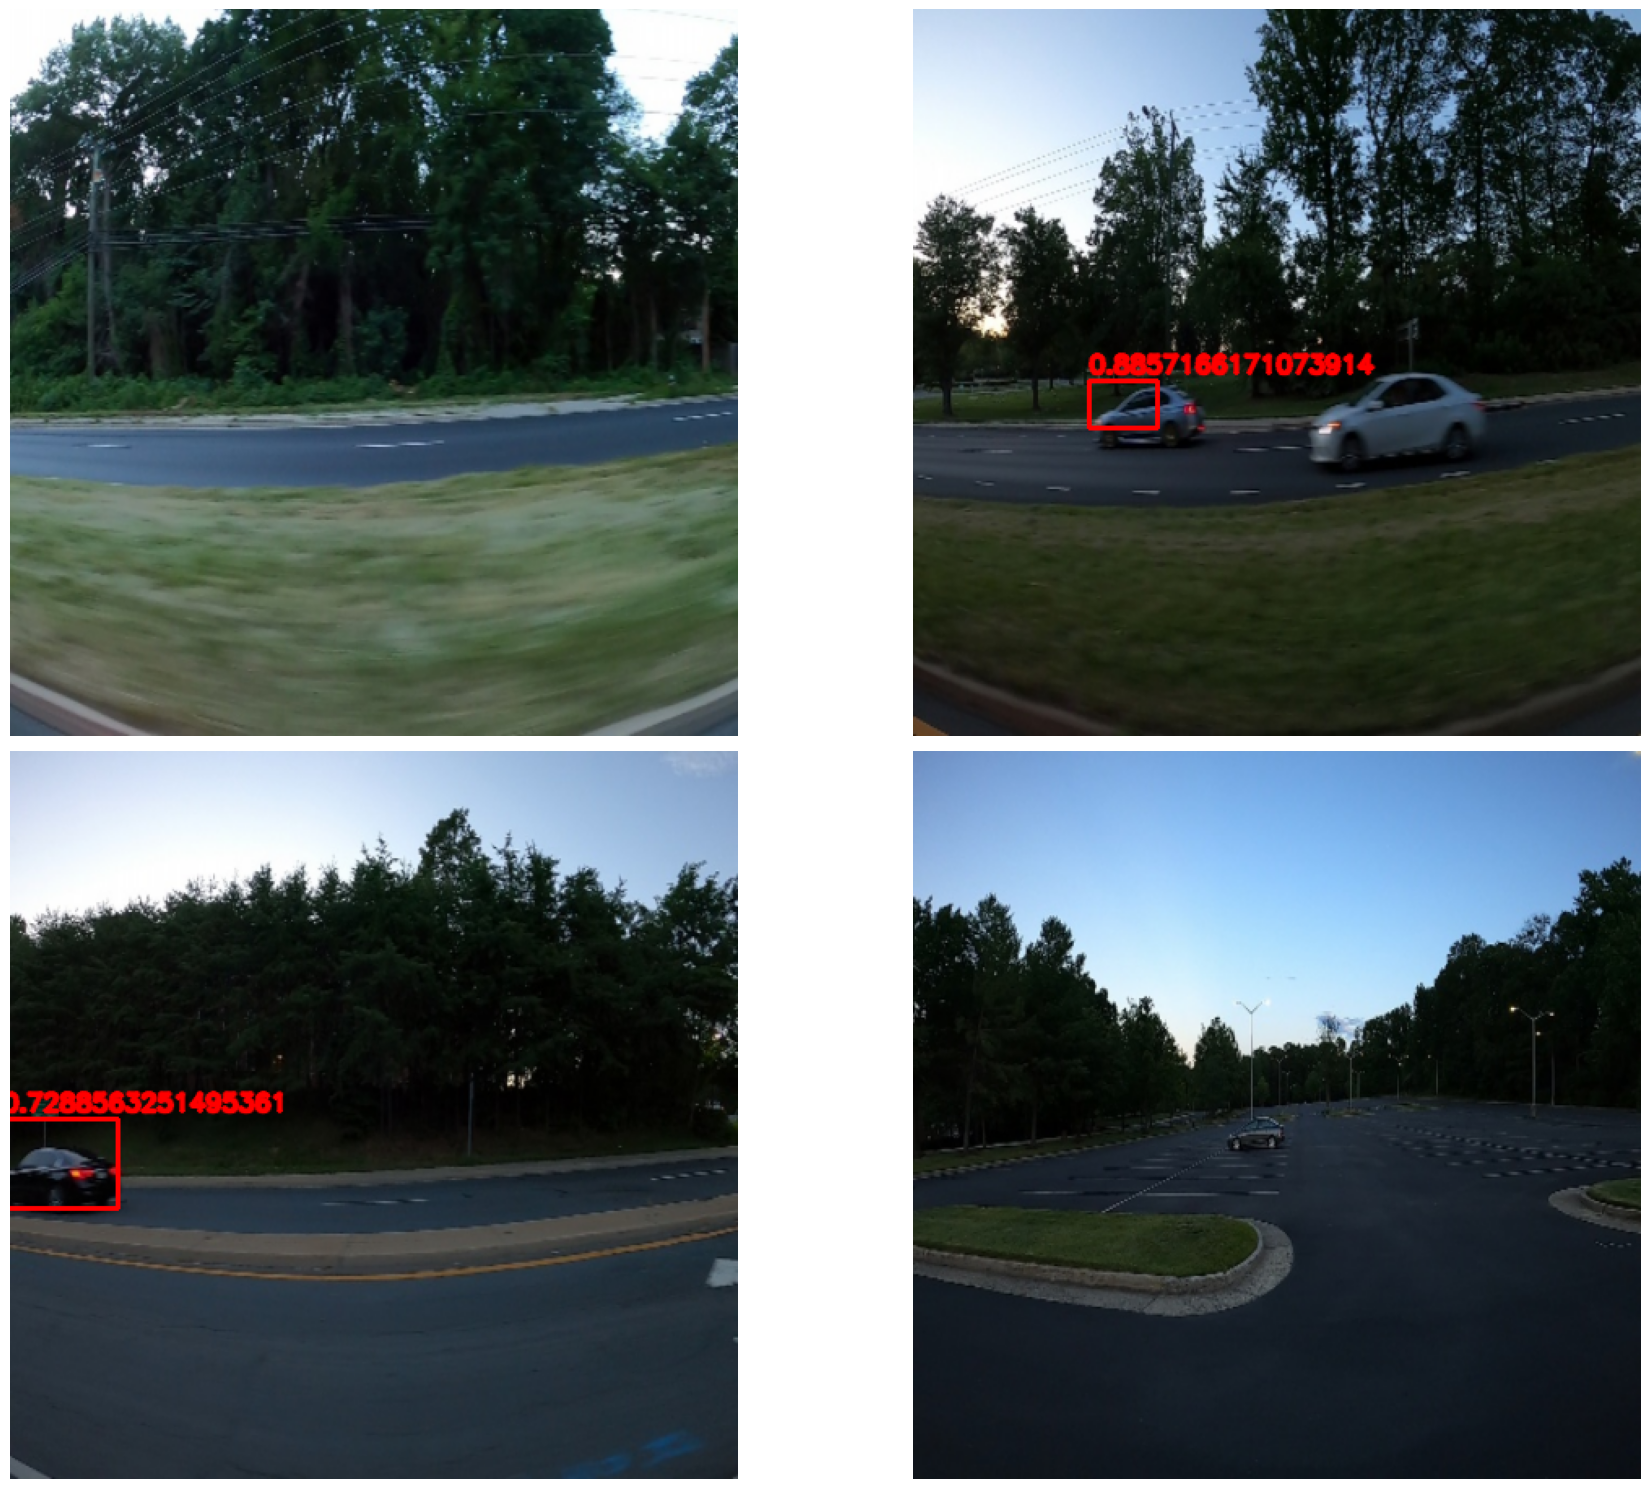

<Figure size 640x480 with 0 Axes>

In [13]:
it = iter(test_loader)
for _ in range(2):
    batch_image, _ = next(it)

fig = plt.figure(figsize=(20, 15))
for i in range(4):  
    image = batch_image[i].to(config.DEVICE)
    boxes = get_prediction(model, image.unsqueeze(0), threshold=0.7, iou_threshold=0.5)
    numpy_image = image.cpu().numpy()
    numpy_image = np.transpose(numpy_image, (1, 2, 0)).astype('uint8')
    numpy_image = np.ascontiguousarray(numpy_image)
    numpy_image = draw_bounding_boxes(numpy_image, boxes, with_confidence_score=True)
    plt.subplot(2, 2, i+1)
    plt.imshow(numpy_image)
    plt.axis('off')
    
plt.tight_layout()
plt.show()
plt.savefig('predicted_images')